In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import glob

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score, precision_score
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [46]:
data_p1 = pd.read_csv('kalman_patients.csv')
#data_p2 = pd.read_csv('training/p03044.psv', sep = '|')

data_p1.shape

(188453, 42)

In [47]:
allFiles = glob.glob("Full_data/p*.psv")
np_array_list = []
for file_ in allFiles:
    #print(file_)
    df = pd.read_csv(file_,sep = '|')
    data_p1 = pd.concat([data_p1, df])
    data_p1.shape
    

In [48]:
data_p1.shape

(188453, 42)

In [49]:
data_p1.describe()

,pid,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,188453.000000,188453.000000,188453.000000,188453.000000,188453.000000,188453.000000,188453.000000,188453.000000,188453.000000,188453.000000,...,188453.000000,188453.000000,188453.000000,188453.000000,188453.000000,188453.000000,188453.000000,188453.000000,188453.000000,188453.000000
mean,2489.418714,83.853985,97.048876,36.781845,126.618097,86.857165,66.689946,18.587337,34.687665,-3.754617,...,10.379732,306.025180,198.918002,60.554085,0.541180,0.488352,0.511648,-65.130534,25.587913,0.013919
std,1451.550698,17.830954,3.428268,0.665020,24.222410,16.599543,14.132607,4.876271,17.089819,2.036350,...,7.310137,54.184135,97.578125,16.269188,0.498303,0.422734,0.422734,235.957301,27.142730,0.117153
min,1.000000,-262.000000,-152.578383,30.900000,-102.231297,-14.502097,-105.087584,-93.535844,-911.000000,-96.126276,...,-10.123160,-145.651770,-108.075399,16.000000,0.000000,0.000000,0.000000,-5366.860000,1.000000,0.000000
25%,1220.000000,71.000000,95.759615,36.400000,109.000000,75.000000,57.000000,16.000000,34.687665,-3.754617,...,7.100000,306.025180,139.000000,50.000000,0.000000,0.000000,0.000000,-56.580000,10.000000,0.000000
50%,2495.000000,82.000000,97.531183,36.737171,124.000000,85.000000,65.000000,18.000000,34.687665,-3.754617,...,9.800000,306.025180,195.000000,62.000000,1.000000,0.488352,0.511648,-8.800000,20.000000,0.000000
75%,3746.000000,95.000000,99.000000,37.154919,142.000000,96.365822,75.000000,21.000000,34.687665,-3.754617,...,12.067581,306.025180,241.000000,72.000000,1.000000,1.000000,1.000000,-3.160000,34.000000,0.000000
max,5000.000000,194.000000,137.761974,42.918218,299.000000,296.000000,296.000000,132.500000,530.000000,69.100000,...,440.020283,2066.375661,2322.000000,101.000000,1.000000,1.000000,1.000000,0.000000,336.000000,1.000000


In [50]:
data_p1.head()

,pid,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,1,93.089352,93.454455,36.530036,110.334612,77.395857,57.613822,21.705762,34.687665,-3.754617,...,10.8,306.02518,170.0,73,1,1.0,0.0,-214.64,1,0
1,1,93.000000,92.500000,36.545187,110.000000,76.000000,56.000000,22.000000,34.687665,-3.754617,...,10.8,306.02518,170.0,73,1,1.0,0.0,-214.64,2,0
2,1,91.000000,96.000000,36.560518,108.000000,84.500000,72.000000,23.500000,34.687665,-3.754617,...,10.8,306.02518,170.0,73,1,1.0,0.0,-214.64,3,0
3,1,93.000000,98.000000,36.576077,123.000000,87.000000,61.000000,21.000000,34.687665,-3.754617,...,10.8,306.02518,170.0,73,1,1.0,0.0,-214.64,4,0
4,1,93.000000,95.000000,36.591912,110.000000,81.000000,70.000000,20.000000,34.687665,-3.754617,...,10.8,306.02518,170.0,73,1,1.0,0.0,-214.64,5,0


In [51]:
data = np.asarray(data_p1)
print(data.shape)

X = data[:,:-1]
print(X.shape)

y = data[:,-1]
print(y.shape)

(188453, 42)
(188453, 41)
(188453,)


In [52]:
count = np.count_nonzero(y_test==1)
print('Positive', count)
count = np.count_nonzero(y_test==0)
print('Negative', count)


Positive 787
Negative 55749


In [53]:
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('Train :', X_train.shape, y_train.shape)
print('Test :', X_test.shape, y_test.shape)

def split_dataset(patients, ratios):
    positive = patients[patients['SepsisLabel'] == 1]['pid'].unique().tolist()
    negative = [i for i in range(1, 5000+1) if i not in positive]
    random.shuffle(positive)
    random.shuffle(negative)
    pos_idx, neg_idx = get_split_indices(len(positive), len(negative), ratios)
    
    train = positive[0:pos_idx[0]] + negative[0:neg_idx[0]]
    val = positive[pos_idx[0]:pos_idx[0] + pos_idx[1]] + negative[neg_idx[0]:neg_idx[0] + neg_idx[1]]
    test = positive[pos_idx[0] + pos_idx[1]:] + negative[neg_idx[0] + neg_idx[1]:]
    
    train_list, val_list, test_list = [], [], []
    for pid in train:
        train_list.append(pid)
    for pid in val:
        val_list.append(pid)
    for pid in test:
        test_list.append(pid)
    
    return train_list, val_list, test_list

Train : (131917, 41) (131917,)
Test : (56536, 41) (56536,)


Recall is:  0.5043217053163704
Precision is:  0.659765843876257
Accuracy is:  0.9859558511390972
F1 score: 0.5051270590609264


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


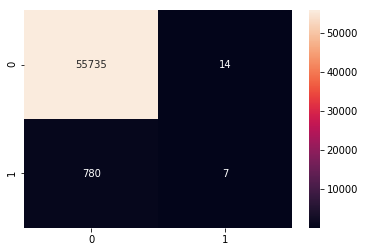

In [77]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_predicted_lreg = clf.predict(X_test)
 
y_score = (clf.score(X_test, y_test))

recall_lreg = recall_score(y_test, y_predicted_lreg, average='macro')
print('Recall is: ', recall_lreg)

precision_lreg = precision_score(y_test, y_predicted_lreg, average='macro')
print('Precision is: ', precision_lreg)

acc_lreg = accuracy_score(y_test, y_predicted_lreg)
print('Accuracy is: ',acc_lreg)

cm_lreg = confusion_matrix(y_test, y_predicted_lreg)
sns.heatmap(cm_lreg,annot=True,fmt="d")

f1_lreg = f1_score(y_test, y_predicted_lreg, average='macro')
print('F1 score:', f1_lreg)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


For train : 
Recall is:  0.9915500466870156
Precision is:  0.9993274666019477
Accuracy is:  0.9997498427041246
F1 score: 0.9182317009780243
For test : 
Recall is:  0.8708319119484151
Precision is:  0.9800334163579061
Accuracy is:  0.9960202348945805
F1 score: 0.9182317009780243


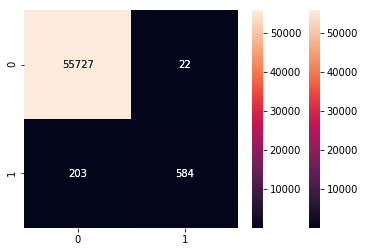

In [80]:
#random forest classifier with n_estimators=10 (default) 
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)


y_pred_train = clf_rf.predict(X_train)
#y_score = clr_rf.decision_function(X_test)
print('For train : ')
recall= recall_score(y_train, y_pred_train, average='macro')
print('Recall is: ', recall)

precision = precision_score(y_train, y_pred_train, average='macro')
print('Precision is: ', precision)

acc_rf = accuracy_score(y_train,clf_rf.predict(X_train))
print('Accuracy is: ',acc_rf)

cm_rf_train = confusion_matrix(y_train,clf_rf.predict(X_train))
sns.heatmap(cm_rf,annot=True,fmt="d")

f1_rf_train = f1_score(y_train, y_pred_train, average='macro')
print('F1 score:', f1_rf)

###############################################################
print('For test : ')

y_pred = clf_rf.predict(X_test)
#y_score = clr_rf.decision_function(X_test)

recall= recall_score(y_test, y_pred, average='macro')
print('Recall is: ', recall)

precision = precision_score(y_test, y_pred, average='macro')
print('Precision is: ', precision)

acc_rf = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',acc_rf)

cm_rf = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm_rf,annot=True,fmt="d")

f1_rf = f1_score(y_test, y_pred, average='macro')
print('F1 score:', f1_rf)

In [37]:
#!pip install imblearn

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

Xs, ys = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(Xs, ys)
print('Resampled dataset shape %s' % Counter(y_res))
Resampled dataset shape Counter({0: 900, 1: 900})

In [82]:
data_p1.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

Negative:  185844
Positive :  2623


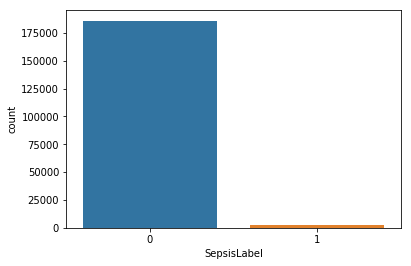

In [116]:
label = data_p1.SepsisLabel
gender_dist = data_p1.Gender
ax = sns.countplot(label,label="Count")       # M = 212, B = 357
B, M = label.value_counts()
print('Negative: ',B)
print('Positive : ',M)

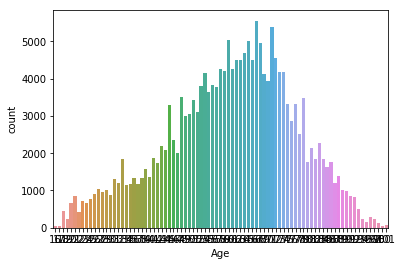

In [84]:
age_dist = data_p1.Age
ax = sns.countplot(age_dist,label="Count")       # M = 212, B = 357
#B, M = gender_dist.value_counts()

In [85]:
list = ['SepsisLabel']
feature_data = data_p1.drop(list,axis = 1 )
feature_data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,86,0,1.0,0.0,-2.8,1
1,82.0,100.0,NaN,205.0,130.0,91.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,86,0,1.0,0.0,-2.8,2
2,85.0,99.0,36.3,185.0,115.0,80.0,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,86,0,1.0,0.0,-2.8,3
3,83.0,99.0,NaN,181.0,117.0,81.0,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,86,0,1.0,0.0,-2.8,4
4,84.0,99.5,NaN,190.0,125.5,83.5,22.5,NaN,NaN,NaN,...,NaN,10.7,NaN,146.0,86,0,1.0,0.0,-2.8,5


In [91]:
feature_data.shape
nan_stat = feature_data.isna().sum()/feature_data.shape[0]

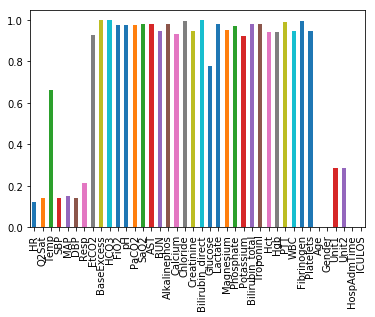

In [96]:
nan_stat.plot.bar()

In [98]:
nan_stat[nan_stat > 0.5]

Temp                0.663135
EtCO2               0.927494
BaseExcess          0.997825
HCO3                0.998265
FiO2                0.977588
pH                  0.977816
PaCO2               0.977789
SaO2                0.981302
AST                 0.982108
BUN                 0.944866
Alkalinephos        0.982002
Calcium             0.931813
Chloride            0.993834
Creatinine          0.944802
Bilirubin_direct    0.997681
Glucose             0.777961
Lactate             0.981365
Magnesium           0.952474
Phosphate           0.970854
Potassium           0.923265
Bilirubin_total     0.981965
TroponinI           0.981201
Hct                 0.941953
Hgb                 0.941406
PTT                 0.990062
WBC                 0.947646
Fibrinogen          0.994317
Platelets           0.946839
dtype: float64

In [100]:
feature_copy =feature_data.copy()
feature_copy.fillna(method = 'backfill', inplace=True)
feature_copy.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
count,188467.000000,188467.00000,188467.000000,188467.000000,188467.000000,188467.000000,188467.000000,188376.000000,187576.000000,187576.000000,...,188440.000000,188461.000000,188428.000000,188461.000000,188467.000000,188467.000000,188467.000000,188467.000000,188467.000000,188467.000000
mean,83.925483,97.08436,36.775658,126.746056,86.913980,66.740225,18.599689,32.748715,-2.735286,23.239195,...,42.096534,10.422908,288.043115,198.956646,60.555975,0.541140,0.493763,0.506237,-65.125904,25.586570
std,17.860668,3.01841,0.701358,24.439461,16.853676,14.262916,4.887681,11.083908,4.740792,3.829848,...,36.900216,7.837404,144.244636,98.521049,16.270062,0.498306,0.499962,0.499962,235.949149,27.142192
min,20.000000,20.00000,30.900000,20.000000,30.000000,20.000000,1.000000,10.000000,-23.200000,7.700000,...,20.000000,0.100000,35.000000,2.000000,16.000000,0.000000,0.000000,0.000000,-5366.860000,1.000000
25%,71.000000,96.00000,36.400000,109.000000,75.000000,57.000000,16.000000,27.000000,-5.350000,21.300000,...,28.000000,6.900000,195.000000,134.000000,50.000000,0.000000,0.000000,0.000000,-56.450000,10.000000
50%,82.000000,98.00000,36.700000,124.000000,85.000000,65.000000,18.000000,33.000000,-2.800000,23.700000,...,31.600000,9.400000,251.000000,187.000000,62.000000,1.000000,0.000000,1.000000,-8.800000,20.000000
75%,95.000000,99.00000,37.200000,142.000000,97.000000,75.000000,21.000000,37.000000,0.200000,25.900000,...,38.000000,12.400000,359.000000,247.000000,72.000000,1.000000,1.000000,1.000000,-3.160000,34.000000
max,194.000000,100.00000,42.100000,299.000000,296.000000,296.000000,100.000000,100.000000,13.300000,35.300000,...,250.000000,440.000000,1179.000000,2322.000000,101.000000,1.000000,1.000000,1.000000,0.000000,336.000000


In [102]:
feature_copy.isna().sum()

HR                    0
O2Sat                 0
Temp                  0
SBP                   0
MAP                   0
DBP                   0
Resp                  0
EtCO2                91
BaseExcess          891
HCO3                891
FiO2                268
pH                  273
PaCO2               273
SaO2                369
AST                  39
BUN                   6
Alkalinephos         39
Calcium               6
Chloride            273
Creatinine            6
Bilirubin_direct     64
Glucose               0
Lactate             273
Magnesium             6
Phosphate            26
Potassium             6
Bilirubin_total      39
TroponinI            64
Hct                   6
Hgb                   6
PTT                  27
WBC                   6
Fibrinogen           39
Platelets             6
Age                   0
Gender                0
Unit1                 0
Unit2                 0
HospAdmTime           0
ICULOS                0
dtype: int64

In [107]:
feature_copy.fillna(method = 'ffill', inplace=True)
feature_copy.isna().sum()
feature_copy.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS'],
      dtype='object')

In [62]:
features = feature_data.columns
print(features)

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS'],
      dtype='object')


In [63]:
features_1 = features[0:5]
print(features_1)

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP'], dtype='object')


In [105]:
box_data = pd.concat([label,feature_data.iloc[:,16:32]],axis=1)
box_data = pd.melt(box_data,id_vars="SepsisLabel",
                    var_name="features",
                    value_name='value')

#box_data.head(10)
#box_data['features'].unique
#box_data.shape

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

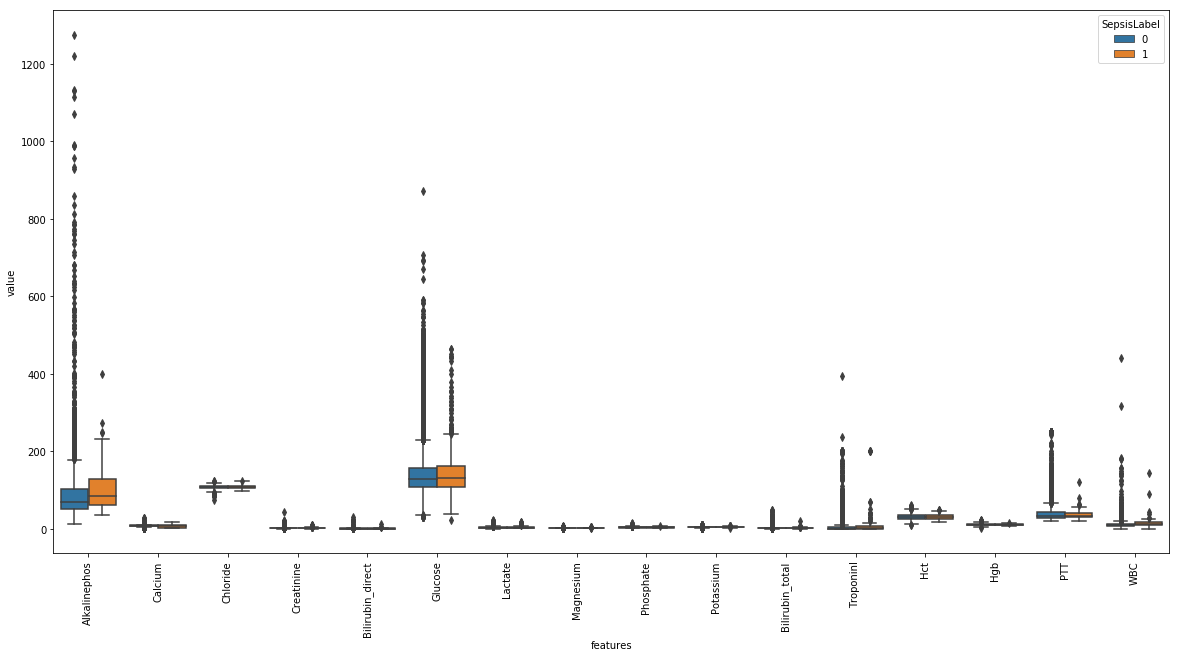

In [106]:
plt.figure(figsize=(20,10))
sns.boxplot(x="features", y="value", hue="SepsisLabel", data=box_data)
plt.xticks(rotation=90)

In [112]:
x_1 = (feature_copy - feature_copy.mean()) / (feature_copy.std())  
y = label

Accuracy is:  0.9945526255283776


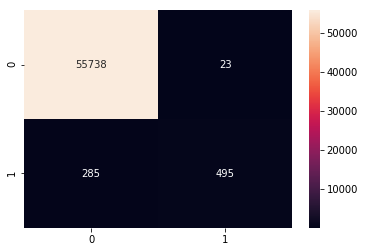

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Feature ranking:
1. feature 39 (0.084326)
2. feature 2 (0.045602)
3. feature 17 (0.034393)
4. feature 0 (0.033968)
5. feature 38 (0.033911)
6. feature 34 (0.033606)
7. feature 21 (0.030694)
8. feature 28 (0.030049)
9. feature 19 (0.029994)
10. feature 29 (0.028459)
11. feature 31 (0.028064)
12. feature 4 (0.026902)
13. feature 6 (0.026638)
14. feature 3 (0.026449)
15. feature 7 (0.026286)
16. feature 23 (0.026077)
17. feature 5 (0.025863)
18. feature 13 (0.025647)
19. feature 33 (0.025505)
20. feature 14 (0.024058)
21. feature 16 (0.023187)
22. feature 22 (0.022222)
23. feature 30 (0.022015)
24. feature 12 (0.021679)
25. feature 15 (0.021676)
26. feature 8 (0.021492)
27. feature 25 (0.020992)
28. feature 24 (0.020380)
29. feature 11 (0.020173)
30. feature 27 (0.019479)
31. feature 10 (0.019308)
32. feature 20 (0.018400)
33. feature 9 (0.018193)
34. feature 32 (0.017641)
35. feature 1 (0.017183)
36. feature 26 (0.017063)
37. feature 18 (0.016777)
38. feature 35 (0.005776)
39. feature 36

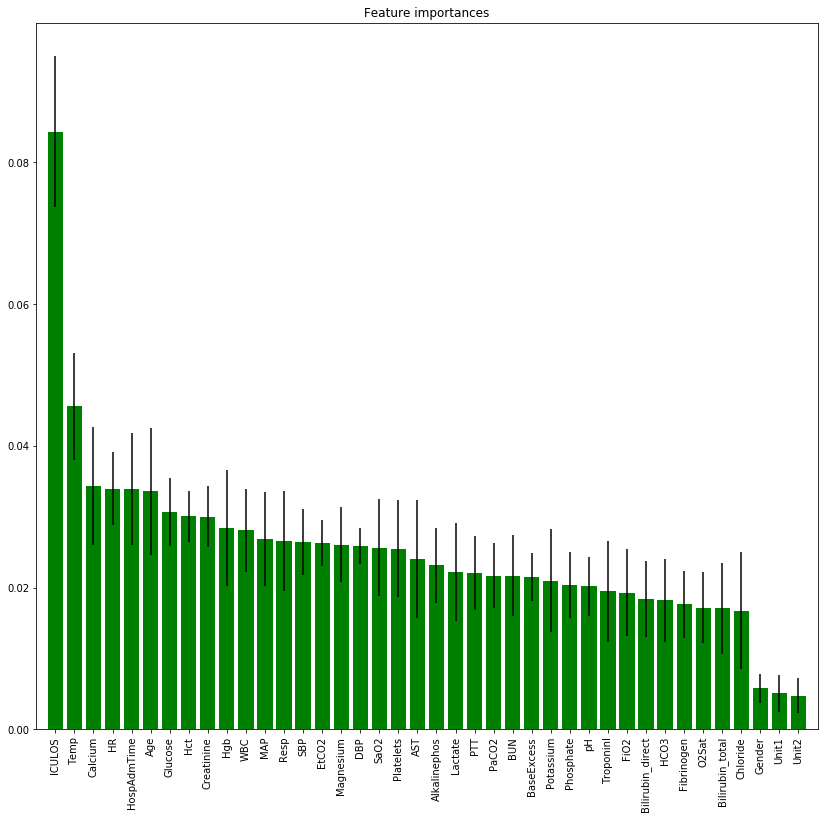

In [114]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [118]:
sampling_data = feature_copy.copy()
sampling_data.shape

(188467, 40)

In [120]:
from sklearn.utils import resample
feature_copy.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS'],
      dtype='object')

In [121]:
merge_data = pd.concat([feature_copy, label], axis = 1)

count    188467.000000
mean          0.013918
std           0.117149
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SepsisLabel, dtype: float64

In [139]:
data_positive = merge_data[merge_data.SepsisLabel == 1]
data_negative = merge_data[merge_data.SepsisLabel == 0]
data_positive.shape

(2623, 41)

In [140]:
data_positive_up = resample(data_positive, replace = True, n_samples = 10000, random_state = 123)
data_positive_up.shape

(10000, 41)

In [141]:
data_negative_down = resample(data_negative, replace = False, n_samples = 40000, random_state = 123)

In [142]:
sampled_data = pd.concat([data_positive_up, data_negative_down])

In [143]:
sepsis_label = sampled_data.SepsisLabel

In [146]:
sampled_train_data = sampled_data.drop('SepsisLabel', axis = 1)
sampled_train_data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS'],
      dtype='object')

In [150]:
sampled_train_data = (sampled_train_data - sampled_train_data.mean())/sampled_train_data.std()

Accuracy is:  0.9948666666666667


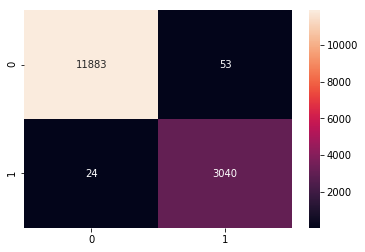

In [151]:
x_train, x_test, y_train, y_test = train_test_split(sampled_train_data, sepsis_label, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Feature ranking:
1. feature 39 (0.127361)
2. feature 38 (0.064104)
3. feature 2 (0.050591)
4. feature 17 (0.043105)
5. feature 31 (0.031164)
6. feature 34 (0.027939)
7. feature 0 (0.027788)
8. feature 19 (0.027634)
9. feature 30 (0.027073)
10. feature 33 (0.025820)
11. feature 21 (0.025658)
12. feature 32 (0.024792)
13. feature 13 (0.024548)
14. feature 12 (0.024203)
15. feature 15 (0.024155)
16. feature 14 (0.023958)
17. feature 28 (0.022816)
18. feature 29 (0.022552)
19. feature 27 (0.022391)
20. feature 23 (0.022165)
21. feature 22 (0.021762)
22. feature 16 (0.021668)
23. feature 8 (0.021045)
24. feature 25 (0.020339)
25. feature 24 (0.020227)
26. feature 6 (0.020217)
27. feature 11 (0.019757)
28. feature 9 (0.018691)
29. feature 26 (0.017557)
30. feature 5 (0.016877)
31. feature 7 (0.016469)
32. feature 3 (0.015936)
33. feature 4 (0.015063)
34. feature 18 (0.014594)
35. feature 20 (0.014008)
36. feature 1 (0.012925)
37. feature 10 (0.011669)
38. feature 35 (0.004495)
39. feature 36

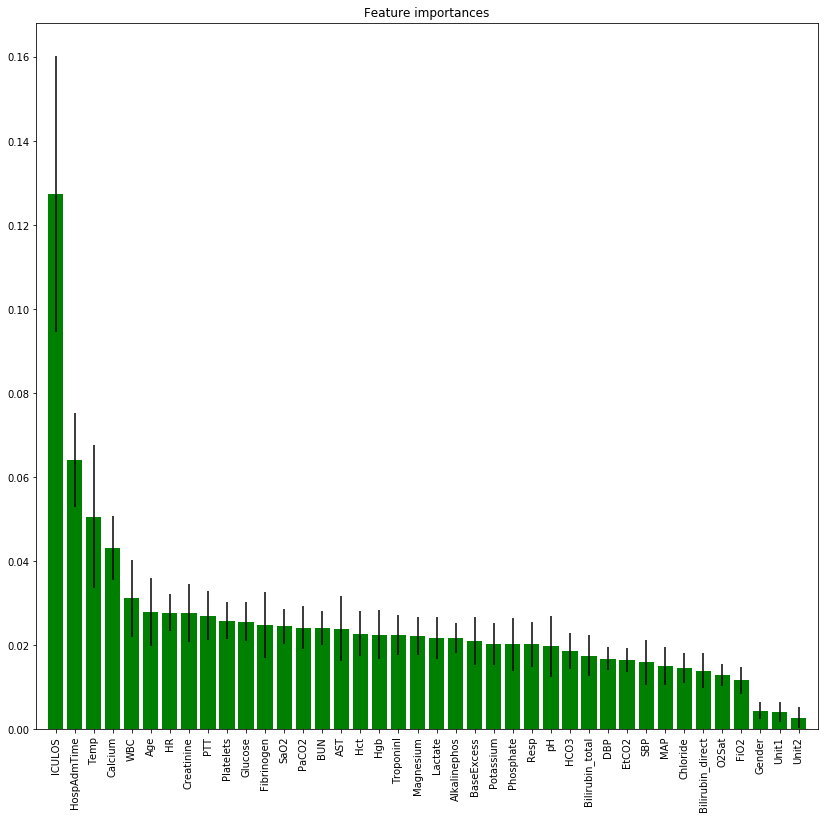

In [152]:
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [6]:
p_data = pd.read_csv('Full_data/p03044.psv', sep = '|')

In [7]:
allFiles = glob.glob("Full_data/p*.psv")
np_array_list = []
for file_ in allFiles:
    #print(file_)
    dftmp = pd.read_csv(file_,sep = '|')
    dftmp.fillna(method = 'backfill', inplace=True)
    dftmp.fillna(method = 'ffill', inplace=True)
    p_data = pd.concat([p_data, dftmp])

In [32]:
p_data.shape
nan_stat = p_data.isna().sum()/p_data.shape[0]

In [9]:
print(nan_stat)

HR                  0.000080
O2Sat               0.000005
Temp                0.000605
SBP                 0.000488
MAP                 0.002377
DBP                 0.000812
Resp                0.002579
EtCO2               0.802788
BaseExcess          0.961144
HCO3                0.974606
FiO2                0.659224
pH                  0.665554
PaCO2               0.664939
SaO2                0.700218
AST                 0.528830
BUN                 0.058488
Alkalinephos        0.528299
Calcium             0.057198
Chloride            0.906360
Creatinine          0.058281
Bilirubin_direct    0.905782
Glucose             0.044841
Lactate             0.724196
Magnesium           0.139186
Phosphate           0.373094
Potassium           0.054057
Bilirubin_total     0.528071
TroponinI           0.650618
Hct                 0.071429
Hgb                 0.071079
PTT                 0.743064
WBC                 0.072671
Fibrinogen          0.873384
Platelets           0.072076
Age           

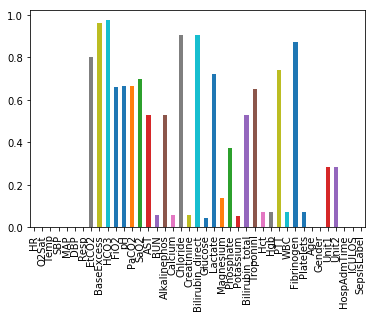

In [33]:
nan_stat.plot.bar()
#particle filtering

In [34]:
bad_features = nan_stat[nan_stat > 0.3]
bad_features.index.tolist()

['EtCO2',
 'BaseExcess',
 'HCO3',
 'FiO2',
 'pH',
 'PaCO2',
 'SaO2',
 'AST',
 'Alkalinephos',
 'Chloride',
 'Bilirubin_direct',
 'Lactate',
 'Phosphate',
 'Bilirubin_total',
 'TroponinI',
 'PTT',
 'Fibrinogen']

In [35]:
drop_features = bad_features.index.tolist()
good_feature_data = p_data.drop(drop_features, axis = 1)

In [36]:
good_feature_data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BUN', 'Calcium',
       'Creatinine', 'Glucose', 'Magnesium', 'Potassium', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS',
       'SepsisLabel'],
      dtype='object')

In [37]:
good_feature_data.shape

(188467, 24)

In [41]:
nan_stat = good_feature_data.isna().sum()/good_feature_data.shape[0]
print(nan_stat)

HR             0.000080
O2Sat          0.000005
Temp           0.000605
SBP            0.000488
MAP            0.002377
DBP            0.000812
Resp           0.002579
BUN            0.058488
Calcium        0.057198
Creatinine     0.058281
Glucose        0.044841
Magnesium      0.139186
Potassium      0.054057
Hct            0.071429
Hgb            0.071079
WBC            0.072671
Platelets      0.072076
Age            0.000000
Gender         0.000000
Unit1          0.284777
Unit2          0.284777
HospAdmTime    0.000000
ICULOS         0.000000
SepsisLabel    0.000000
dtype: float64


In [44]:
good_feature_data.dropna(inplace = True)

In [46]:
y = good_feature_data.SepsisLabel
x_1 = good_feature_data.drop('SepsisLabel', axis = 1)

Accuracy is:  0.9956319491717722


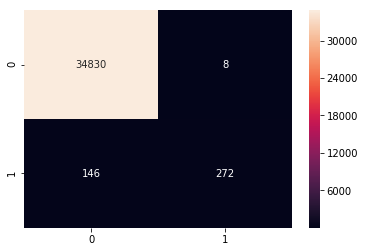

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Feature ranking:
1. feature 22 (0.132083)
2. feature 2 (0.062226)
3. feature 15 (0.056502)
4. feature 8 (0.053534)
5. feature 10 (0.051873)
6. feature 6 (0.049593)
7. feature 16 (0.048506)
8. feature 0 (0.047887)
9. feature 17 (0.047242)
10. feature 12 (0.045395)
11. feature 7 (0.044449)
12. feature 9 (0.042213)
13. feature 13 (0.041770)
14. feature 21 (0.040644)
15. feature 14 (0.040412)
16. feature 3 (0.040299)
17. feature 4 (0.038101)
18. feature 5 (0.036892)
19. feature 11 (0.033705)
20. feature 1 (0.025883)
21. feature 18 (0.007983)
22. feature 19 (0.007384)
23. feature 20 (0.005425)


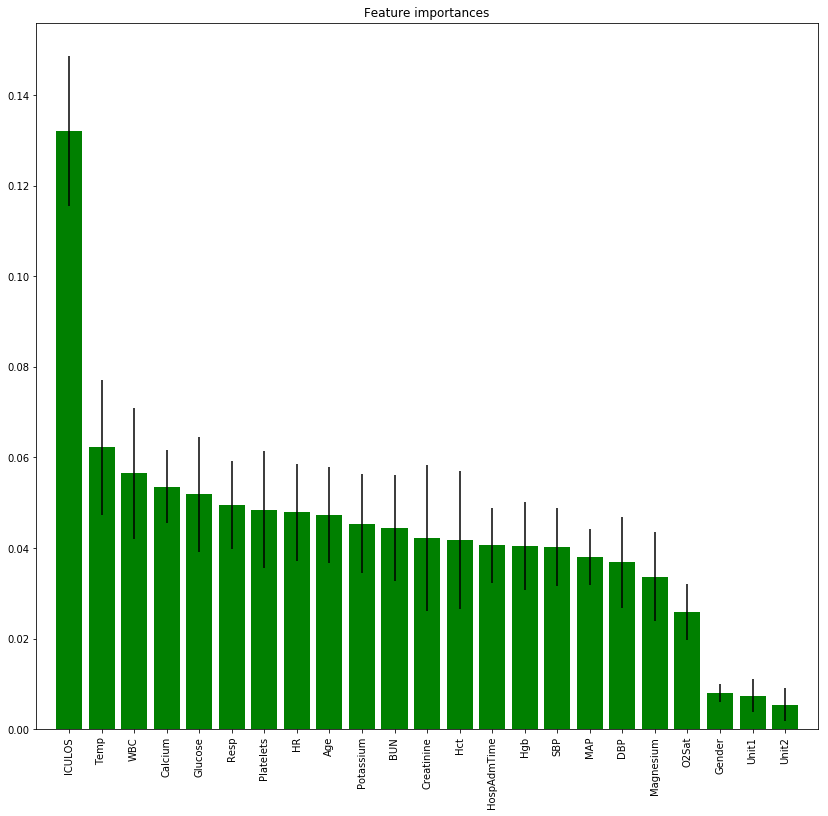

In [48]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [4]:
p_data = pd.read_csv('Full_data/p03044.psv', sep = '|')
iculos_nan = []
p_data['ICULOS'].isna().sum()/p_data.shape[0]
feature_list = p_data.columns
print(feature_list)

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')


In [30]:
allFiles = glob.glob("Full_data/p*.psv")
nan_stats = {}
for feature in feature_list:
    new_list = []
    nan_stats[feature] = new_list
    
for file_ in allFiles:
    #print(file_)
    dftmp = pd.read_csv(file_,sep = '|')
    for feature in feature_list:
        nan_ratio = dftmp[feature].isna().sum()/dftmp.shape[0]
        nan_stats[feature].append(nan_ratio)
    dftmp.fillna(method = 'backfill', inplace=True)
    dftmp.fillna(method = 'ffill', inplace=True)
    p_data = pd.concat([p_data, dftmp])

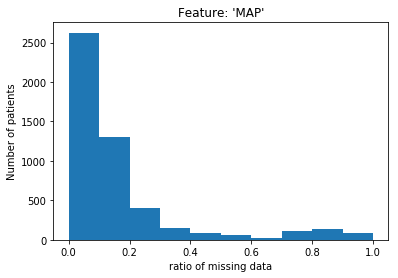

In [29]:
import matplotlib.pyplot as plt
plt.hist(nan_stats['MAP'])
plt.xlabel('ratio of missing data')
plt.ylabel('Number of patients')
plt.title('Feature: \'MAP\'')
plt.show()

In [31]:
p_data.isna().sum()/p_data.shape[0]

HR                  0.061305
O2Sat               0.071105
Temp                0.331853
SBP                 0.070668
MAP                 0.076098
DBP                 0.070930
Resp                0.108105
EtCO2               0.865136
BaseExcess          0.979484
HCO3                0.986435
FiO2                0.818399
pH                  0.821678
PaCO2               0.821357
SaO2                0.840754
AST                 0.755460
BUN                 0.501658
Alkalinephos        0.755142
Calcium             0.494487
Chloride            0.950096
Creatinine          0.501523
Bilirubin_direct    0.951730
Glucose             0.411387
Lactate             0.852775
Magnesium           0.545813
Phosphate           0.671962
Potassium           0.488642
Bilirubin_total     0.755009
TroponinI           0.815903
Hct                 0.506675
Hgb                 0.506227
PTT                 0.866558
WBC                 0.510143
Fibrinogen          0.933848
Platelets           0.509442
Age           

In [32]:
p_data.fillna(method = 'mean', inplace=True)

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got mean